# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/ashwinabraham/Documents/GitHub/python-api-challenge/WeatherPy/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
import requests
import json
from pprint import pprint
url = f'http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}'
city_name=[]
lat=[]
lon=[]
max_temp=[]
country=[]
cloud=[]
date=[]
wspeed=[]
humidity=[]
result=1
for city in cities:
    try:
        response = requests.get(f'{url}&q={city}').json()
        city_found = response["name"]
        print(f"Found {city_found} : {result}")
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        country.append(response["sys"]["country"])
        cloud.append(response["clouds"]["all"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        wspeed.append(response["wind"]["speed"])
    
        result=result + 1
        
        time.sleep(1.0)
    except:
        print("City not found. Next city.....")
        pass


Found Tasiilaq : 1
Found Mar del Plata : 2
Found Shatsk : 3
Found Ponta do Sol : 4
City not found. Next city.....
Found Bredasdorp : 5
Found Albany : 6
Found Cherskiy : 7
Found Punta Arenas : 8
Found Haines Junction : 9
Found Noumea : 10
Found Grindavik : 11
Found Jamestown : 12
City not found. Next city.....
Found Marulanda : 13
Found Qaanaaq : 14
Found Comodoro Rivadavia : 15
Found Guarujá : 16
Found Rikitea : 17
Found Rocha : 18
Found Ushuaia : 19
Found Buala : 20
Found Hobart : 21
City not found. Next city.....
Found Ancud : 22
Found New Norfolk : 23
Found Hilo : 24
Found Bubaque : 25
Found Logan Lake : 26
City not found. Next city.....
Found Bambous Virieux : 27
Found Ribeira Grande : 28
Found Mitsamiouli : 29
Found Luangwa : 30
Found Mogzon : 31
Found La Santisima Trinidad : 32
Found Saint Anthony : 33
Found Dikson : 34
Found Porto-Novo : 35
Found Pevek : 36
Found Thompson : 37
Found Naryan-Mar : 38
Found Mareeba : 39
Found Cabo San Lucas : 40
City not found. Next city.....
City 

Found Verkhoshizhem'ye : 340
Found Ekpoma : 341
Found Manadhoo : 342
Found Sabang : 343
Found Adrar : 344
Found Portland : 345
Found Novo Aripuanã : 346
Found Katsuura : 347
City not found. Next city.....
Found Kavieng : 348
Found Codrington : 349
Found Broken Hill : 350
Found Lagoa : 351
Found Amalāpuram : 352
Found Heihe : 353
Found Suárez : 354
Found Luganville : 355
City not found. Next city.....
Found Effingham County : 356
Found Ilulissat : 357
Found Neuquén : 358
Found Galveston : 359
Found Coquimbo : 360
Found Saint-Joseph : 361
Found Yamada : 362
Found Burns Lake : 363
Found Cuiluan : 364
Found Dingle : 365
Found Alice Springs : 366
Found Chirongui : 367
Found ‘Ewa Beach : 368
Found Kasongo : 369
Found Suntar : 370
Found Eureka : 371
Found Schotten : 372
Found Praia da Vitória : 373
Found Haileybury : 374
Found Mozarlândia : 375
Found Goroka : 376
Found Harper : 377
Found Ratnagiri : 378
Found Ilhabela : 379
City not found. Next city.....
Found Ak-Dovurak : 380
Found Magomeni 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [47]:
city_df=pd.DataFrame(
{'City':city_name,
'Cloudiness':cloud,
 'Country':country,
 'Date':date,
 'Humidity':humidity,
 'Lat':lat,
 'Lng':lon,
 'Max Temp':max_temp,
 'Wind Speed':wspeed,
}
)
city_df.to_csv(f'{output_data_file}',index=False, header=True)

In [48]:
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tasiilaq,62,GL,1584069302,66,65.61,-37.64,12.20,23.04
1,Mar del Plata,5,AR,1584069291,94,-38.00,-57.56,72.00,4.70
2,Shatsk,100,RU,1584069451,79,54.03,41.71,43.52,22.93
3,Ponta do Sol,40,PT,1584069301,72,32.67,-17.10,62.60,16.11
4,Bredasdorp,0,ZA,1584069296,93,-34.53,20.04,62.60,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

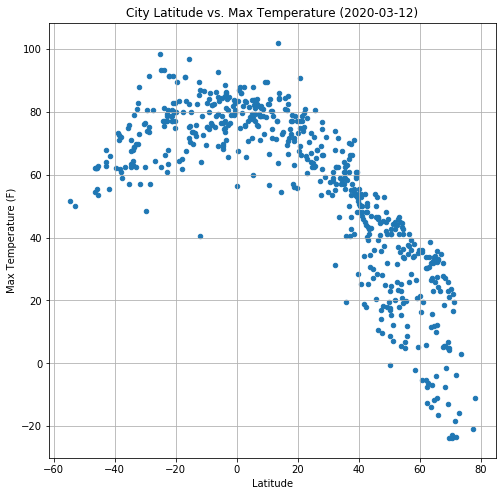

In [29]:
import datetime
today = datetime.date.today()

city_df.plot(kind='scatter', x='Lat', y='Max Temp', grid=True, figsize=(8,8),
              title=f'City Latitude vs. Max Temperature ({today})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("/Users/ashwinabraham/Documents/GitHub/python-api-challenge/WeatherPy/Images/lat_temp.png")
plt.show()

## The code executes the plot to show the scatter data of latitude vs maximum temperature in each random city across the globe. 
## We can see that as x goes to zero(the equator), from both southern and northern hemisphere, the temperature rises. Which makes sense.

#### Latitude vs. Humidity Plot

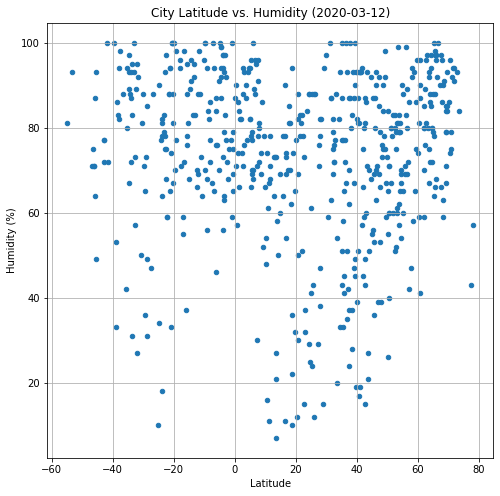

In [30]:
city_df.plot(kind='scatter', x='Lat', y='Humidity', grid=True, figsize=(8,8),
              title=f'City Latitude vs. Humidity ({today})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("/Users/ashwinabraham/Documents/GitHub/python-api-challenge/WeatherPy/Images/lat_humid.png")
plt.show()
## The code above gives us a scatter plot of humidity percentage across the southern and northern hemisphere. 
##It seems that there is no direct correlation between the humidity and latitude of the cities across the globe

#### Latitude vs. Cloudiness Plot

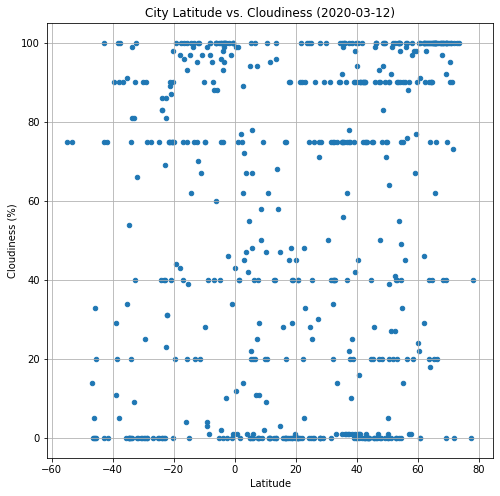

In [31]:
city_df.plot(kind='scatter', x='Lat', y='Cloudiness', grid=True, figsize=(8,8),
              title=f'City Latitude vs. Cloudiness ({today})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("/Users/ashwinabraham/Documents/GitHub/python-api-challenge/WeatherPy/Images/lat_cloud.png")
plt.show()
## The code executes the plot to show the scatter data of latitude vs cloudiness in each random city across the globe.
## there seems to be no correlation between cloudiness of a city and the latitude 

#### Latitude vs. Wind Speed Plot

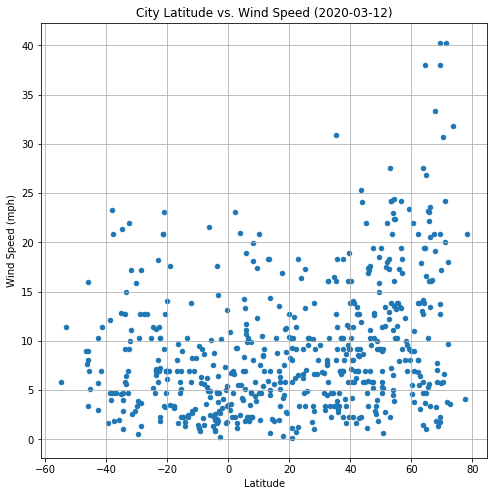

In [32]:
city_df.plot(kind='scatter', x='Lat', y='Wind Speed', grid=True, figsize=(8,8),
              title=f'City Latitude vs. Wind Speed ({today})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("/Users/ashwinabraham/Documents/GitHub/python-api-challenge/WeatherPy/Images/lat_wind.png")
plt.show()
## The code executes the plot to show the scatter data of latitude vs cloudiness in each random city across the globe.

## Linear Regression

In [46]:
# Create Northern and Southern Hemisphere DataFrames
northern_df=city_df.groupby('City')
northern_df=northern_df.filter(lambda x: x['Lat'] >= 0)
output_northern = "/Users/ashwinabraham/Documents/GitHub/python-api-challenge/WeatherPy/northern_hem.csv"
northern_df.to_csv(f'{output_northern}',index=False, header=True)
southern_df=city_df.groupby('City')
southern_df=southern_df.filter(lambda x: x['Lat'] <= 0)
output_southern = "/Users/ashwinabraham/Documents/GitHub/python-api-challenge/WeatherPy/southern_hem.csv"
southern_df.to_csv(f'{output_southern}',index=False, header=True)
southern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Mar del Plata,5,AR,1584069291,94,-38.00,-57.56,72.00,4.70
4,Bredasdorp,0,ZA,1584069296,93,-34.53,20.04,62.60,4.70
7,Punta Arenas,75,CL,1584069297,93,-53.15,-70.92,50.00,11.41
9,Noumea,31,NC,1584069459,59,-22.28,166.46,91.40,10.29
14,Comodoro Rivadavia,33,AR,1584069345,87,-45.87,-67.50,55.40,3.36
...,...,...,...,...,...,...,...,...,...
566,Samarai,97,PG,1584069784,64,-10.62,150.67,86.56,8.30
567,Mari,90,BR,1584070093,100,-7.06,-35.32,75.20,5.32
569,Ngudu,100,TZ,1584070096,97,-2.97,33.33,65.57,2.91
570,Springbok,0,ZA,1584070097,71,-29.66,17.89,48.49,0.58


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8818345549110171


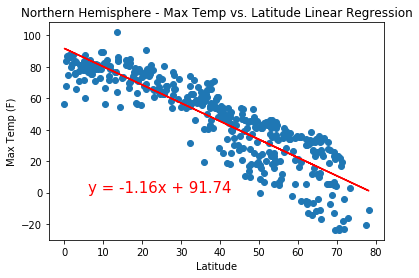

In [34]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue}")
plt.savefig("/Users/ashwinabraham/Documents/GitHub/python-api-challenge/WeatherPy/Images/lat_temp_n.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.534154304076445


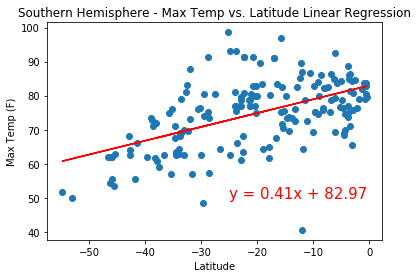

In [35]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue}")
plt.savefig("/Users/ashwinabraham/Documents/GitHub/python-api-challenge/WeatherPy/Images/lat_temp_s.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17104143473583092


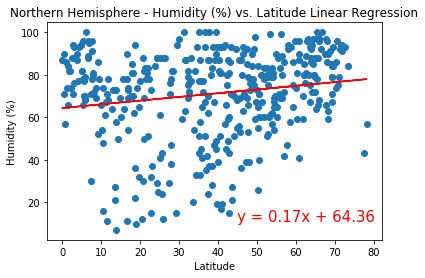

In [36]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,11),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue}")
plt.savefig("/Users/ashwinabraham/Documents/GitHub/python-api-challenge/WeatherPy/Images/lat_hum_n.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10721339021447933


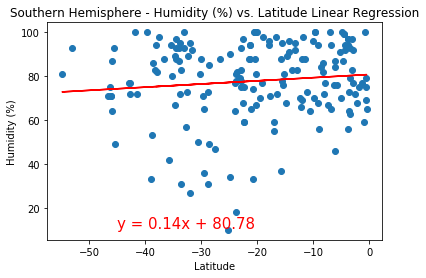

In [37]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,11),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue}")
plt.savefig("/Users/ashwinabraham/Documents/GitHub/python-api-challenge/WeatherPy/Images/lat_hum_s.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.33816603772383


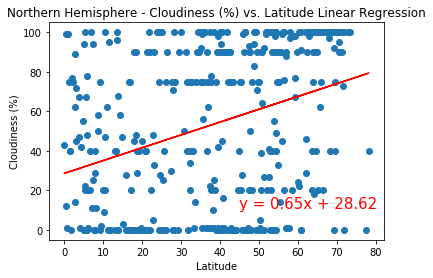

In [38]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,11),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue}")
plt.savefig("/Users/ashwinabraham/Documents/GitHub/python-api-challenge/WeatherPy/Images/lat_cloud_n.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3393965822127209


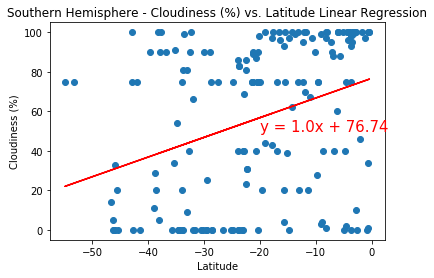

In [39]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,50),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue}")
plt.savefig("/Users/ashwinabraham/Documents/GitHub/python-api-challenge/WeatherPy/Images/lat_cloud_s.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.3362152666874905


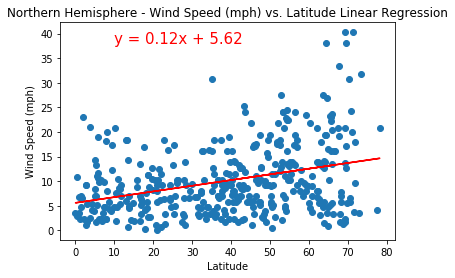

In [40]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,38),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue}")
plt.savefig("/Users/ashwinabraham/Documents/GitHub/python-api-challenge/WeatherPy/Images/lat_wind_n.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2515380978690125


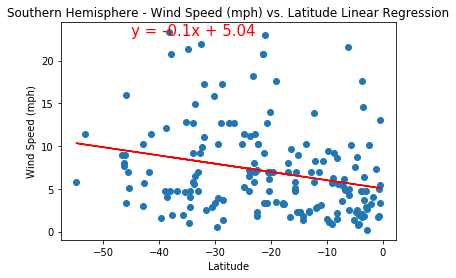

In [41]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,23),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue}")
plt.savefig("/Users/ashwinabraham/Documents/GitHub/python-api-challenge/WeatherPy/Images/lat_wind_s.png")
plt.show()

In [42]:
## There is a positive and negative correlation (r -squared value is close to -1 and 1)between temperature and the latitude. Starting from the northern hemisphere we can see that the temperature decreases as the latitude increases (north), and vise-versa.
##There is absolutely no correlation between the windspeed in the city and the latitude of it.
##There is almost (looks like a positive correlation) no correlation between the humidity of a city and the latitude of the city. Whether it be southern or northern hemisphere.
##Maybe a spread out data would give a better or clear correlation between the humidity and the latitude. Also, this can is affected by the time of the year the data is taken.It varies within the time of the year with seasons.